In [224]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [225]:
train = pd.read_csv('csv/train.csv')
# test = pd.read_csv('csv/test.csv')

In [226]:
X_train = train.drop(["Id","SalePrice", "PoolQC", "MiscFeature", "MiscVal", "Alley", "Fence", "FireplaceQu", "Street", "Utilities", "LandSlope", "Condition1", "Condition2", "RoofMatl", "PavedDrive", "MasVnrArea"], axis=1)
y_train = train[["SalePrice"]]

X_train["LotShape1"] = X_train.LotShape.map({"Reg": "Reg", "IR1": "Irr", "IR2": "Irr", "IR3": "Irr"})
X_train.drop("LotShape", axis=1, inplace=True)

X_train["LotFrontage"].fillna(X_train["LotFrontage"].mean(), inplace=True)
X_train["GarageYrBlt"].fillna(X_train["GarageYrBlt"].mean(), inplace=True)

In [227]:
# X_train.isnull().sum().sort_values(ascending=False).head(25)
# X_train.dtypes[65:85]

In [228]:
object_cols = X_train.columns[X_train.dtypes == "object"]
for col in object_cols:
    X_train[col] = X_train[col].astype("category")

category_cols = X_train.columns[X_train.dtypes == "category"]
for col in category_cols:
    y = pd.get_dummies(X_train[col], prefix=col)
    u = pd.concat([X_train, y], axis=1)
    X_train = u.drop([col], axis=1)

In [230]:
pipelines = []


pipelines.append(
    (
        "scaledGBR",
        Pipeline([("Scaler", StandardScaler()), ("GBR", GradientBoostingRegressor())]),
    )
)
pipelines.append(
    (
        "scaledRFR",
        Pipeline([("Scaler", StandardScaler()), ("RFR", RandomForestRegressor())]),
    )
)

results = []
names = []

for name, model in pipelines:
    cv_results = cross_val_score(
        model, X_train, y_train, cv=10, scoring="r2", n_jobs=-1
    )
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()} ({cv_results.std()})")

/Users/choekyelnyungmartsang/opt/anaconda3/envs/MODEL/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/choekyelnyungmartsang/opt/anaconda3/envs/MODEL/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/choekyelnyungmartsang/opt/anaconda3/envs/MODEL/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/choekyelnyungmartsang/opt/anaconda3/envs/MODEL/lib/python3.9/site-packages/sklearn/ensemble/_

scaledGBR: 0.8882150231469206 (0.03988668251501012)


/Users/choekyelnyungmartsang/opt/anaconda3/envs/MODEL/lib/python3.9/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/choekyelnyungmartsang/opt/anaconda3/envs/MODEL/lib/python3.9/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/choekyelnyungmartsang/opt/anaconda3/envs/MODEL/lib/python3.9/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/choekyelnyungmartsang/opt/anac

scaledRFR: 0.8665037048616521 (0.03920943412395157)


In [231]:
results

[array([0.90403709, 0.9010658 , 0.9368961 , 0.78440918, 0.90772669,
        0.89361961, 0.85530292, 0.90599048, 0.9107008 , 0.88240156]),
 array([0.86517251, 0.8850514 , 0.92342402, 0.78341721, 0.87954424,
        0.89032872, 0.88414063, 0.88799656, 0.80924831, 0.85671344])]

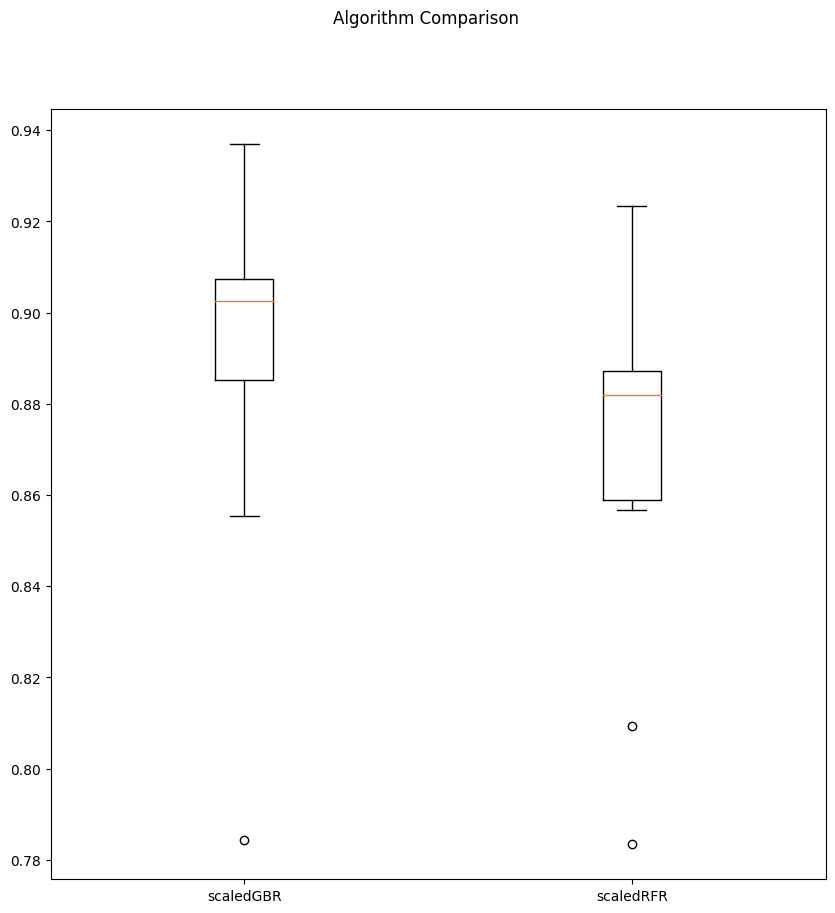

In [232]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()